In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
auth.authenticate_user()
creds,_=default()
gc = gspread.authorize(creds)

In [ ]:
worksheet=gc.open('Deep-1').sheet1

In [ ]:
rows=worksheet.get_all_values()

In [ ]:
df=pd.DataFrame(rows[1:],columns=rows[0])
df=df.astype({'Input':'float'})
df=df.astype({'Output':'float'})
df.head()

,Input,Output
0,1.0,11.0
1,2.0,14.0
2,3.0,17.0
3,4.0,20.0
4,5.0,23.0


In [ ]:
x=df[['Input']].values
y=df[['Output']].values

In [ ]:
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

In [ ]:
ai_brain=Sequential([
    Dense(units=7,input_shape=[1]),
    Dense(units=5,activation='relu'),
    Dense(units=3,activation='relu'),
    Dense(units=1)
])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 1s 674ms/step - loss: 3510.2773
Epoch 2/2500
1/1 [==============================] - 0s 11ms/step - loss: 3506.3860
Epoch 3/2500
1/1 [==============================] - 0s 9ms/step - loss: 3503.6028
Epoch 4/2500
1/1 [==============================] - 0s 10ms/step - loss: 3501.2974
Epoch 5/2500
1/1 [==============================] - 0s 15ms/step - loss: 3499.2495
Epoch 6/2500
1/1 [==============================] - 0s 14ms/step - loss: 3497.3894
Epoch 7/2500
1/1 [==============================] - 0s 10ms/step - loss: 3495.6973
Epoch 8/2500
1/1 [==============================] - 0s 15ms/step - loss: 3494.1211
Epoch 9/2500
1/1 [==============================] - 0s 14ms/step - loss: 3492.6704
Epoch 10/2500
1/1 [==============================] - 0s 9ms/step - loss: 3491.3386
Epoch 11/2500
1/1 [==============================] - 0s 10ms/step - loss: 3490.1492
Epoch 12/2500
1/1 [=============================

<Axes: >

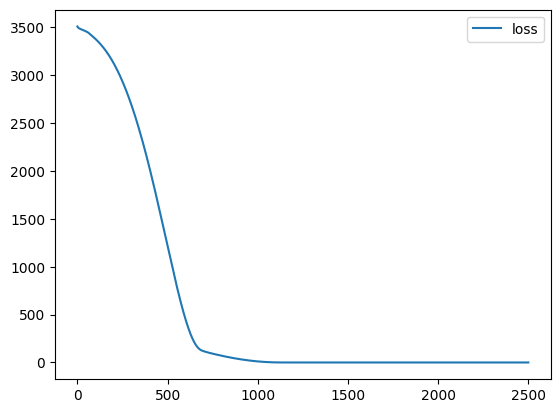

In [ ]:
ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')
ai_brain.fit(X_train1,y_train,epochs = 2500)
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [ ]:
X_test1 = Scaler.transform(X_test)
ai_brain.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 158ms/step - loss: 0.0163


0.016340425238013268

In [ ]:
X_n1 = [[57]]
X_n1_1 = Scaler.transform(X_n1)
ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 87ms/step


array([[178.67284]], dtype=float32)